In [1]:
%run 0_config.ipynb
%run 1_agents.ipynb
%run 2_models.ipynb

In [2]:
sns.set_style("darkgrid")

In [3]:
import random
random.seed(42)

In [4]:
N_agents = 40
Price = 10
Last_Price = Price
p_savers = 0.2
p_followers = 0.1
p_whales = 0.05
savers_sentiment = 0.70
p_passing_followers = 0.7
p_passing_whales = 0.5
WLT = 10

model = Market_Model_4(N_agents, Price, p_savers, p_followers, p_whales, savers_sentiment, p_passing_followers, p_passing_whales, WLT)

## 4. Batch-Run

In [5]:
N_agents = 40
Price = 10
Last_Price = Price
p_savers = 0.20
p_followers = 0.10
p_whales = 0.01
savers_sentiment = 0.60
p_passing_followers = 0
p_passing_whales = 0
WLT = 10

prm_grid = {
    'N_agents': N_agents,
    'Price': Price,
    'p_savers': p_savers,
    'p_followers': p_followers,
    'p_whales': p_whales,
    'p_passing_followers': p_passing_followers,
    'p_passing_whales': p_passing_whales,
    'savers_sentiment': np.arange(0.20, 1.00, 0.10),
    'WLT': WLT
}

In [6]:
results = mesa.batch_run(
    Market_Model_4,
    parameters=prm_grid,
    iterations=50,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,
    display_progress=False
)

In [7]:
results_df = pd.DataFrame(results)
display(results_df)

,RunId,iteration,Step,N_agents,Price,p_savers,p_followers,p_whales,p_passing_followers,p_passing_whales,savers_sentiment,WLT,AgentID,Wealth,Position,Order
0,0,0,0,40,10.400000,0.2,0.1,0.01,0,0,0.2,10,NaN,NaN,NaN,NaN
1,0,0,1,40,10.192000,0.2,0.1,0.01,0,0,0.2,10,saver_5,984.43,sell,0.0
2,0,0,1,40,10.192000,0.2,0.1,0.01,0,0,0.2,10,rnd_trader_27,396.39,buy,1.0
3,0,0,1,40,10.192000,0.2,0.1,0.01,0,0,0.2,10,rnd_trader_19,398.92,buy,1.0
4,0,0,1,40,10.192000,0.2,0.1,0.01,0,0,0.2,10,saver_4,932.00,sell,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600395,399,49,100,40,47.528311,0.2,0.1,0.01,0,0,0.9,10,rnd_trader_5,-479.81,sell,1.0
1600396,399,49,100,40,47.528311,0.2,0.1,0.01,0,0,0.9,10,rnd_trader_0,-527.02,sell,1.0
1600397,399,49,100,40,47.528311,0.2,0.1,0.01,0,0,0.9,10,rnd_trader_15,-512.66,sell,1.0
1600398,399,49,100,40,47.528311,0.2,0.1,0.01,0,0,0.9,10,saver_2,1209.58,buy,0.0


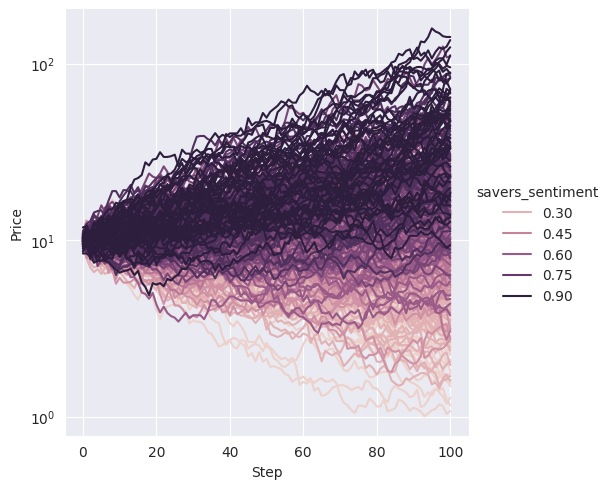

In [8]:
sns.relplot(
    data = results_df, kind = 'line',
    x = 'Step', y = 'Price', hue = 'savers_sentiment',
    units = 'iteration', estimator = None
)
plt.yscale('log');

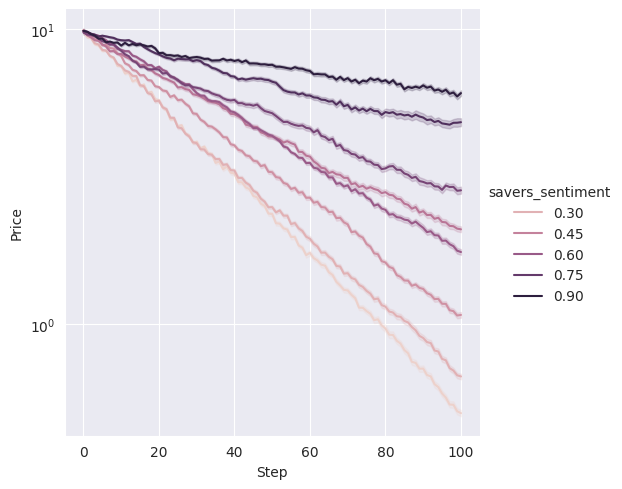

In [10]:
# this is a plot with mean values for each model parameter, with 95% confidence interval error band
sns.relplot(
    data = results_df, kind = 'line',
    x = 'Step', y = 'Price', hue = 'savers_sentiment'
)
plt.yscale('log');

In [9]:
print(results_df['savers_sentiment'].unique())

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [11]:
_ = results_df[ results_df['savers_sentiment'] == results_df['savers_sentiment'].unique()[1]]

In [12]:
display(_)

,RunId,iteration,Step,N_agents,Price,p_savers,p_followers,p_whales,p_passing_followers,p_passing_whales,savers_sentiment,WLT,AgentID,Wealth,Position,Order
4001,1,0,0,40,9.2000,0.2,0.1,0.01,0,0,0.3,10,NaN,NaN,NaN,NaN
4002,1,0,1,40,8.7400,0.2,0.1,0.01,0,0,0.3,10,rnd_trader_17,399.09,sell,1.0
4003,1,0,1,40,8.7400,0.2,0.1,0.01,0,0,0.3,10,rnd_trader_7,402.79,sell,1.0
4004,1,0,1,40,8.7400,0.2,0.1,0.01,0,0,0.3,10,rnd_trader_21,375.44,sell,1.0
4005,1,0,1,40,8.7400,0.2,0.1,0.01,0,0,0.3,10,rnd_trader_13,412.41,sell,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576389,393,49,100,40,6.6629,0.2,0.1,0.01,0,0,0.3,10,rnd_trader_16,-501.67,sell,1.0
1576390,393,49,100,40,6.6629,0.2,0.1,0.01,0,0,0.3,10,rnd_trader_6,-489.89,buy,1.0
1576391,393,49,100,40,6.6629,0.2,0.1,0.01,0,0,0.3,10,saver_6,1357.40,sell,0.0
1576392,393,49,100,40,6.6629,0.2,0.1,0.01,0,0,0.3,10,rnd_trader_12,-517.85,sell,1.0


In [13]:
# But we are interested in a mean + std dev plot

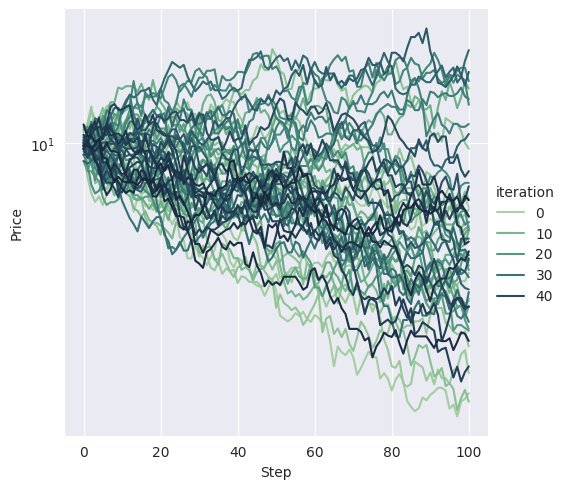

In [14]:
# Take a look at all runs for a given DOF, in this case for a given value of savers_sentiment
sns.relplot(
    data = _, kind = "line",
    x = "Step", y = "Price", hue = 'iteration', palette="ch:r=-.5,l=.75",
    estimator = None
)
plt.yscale('log');

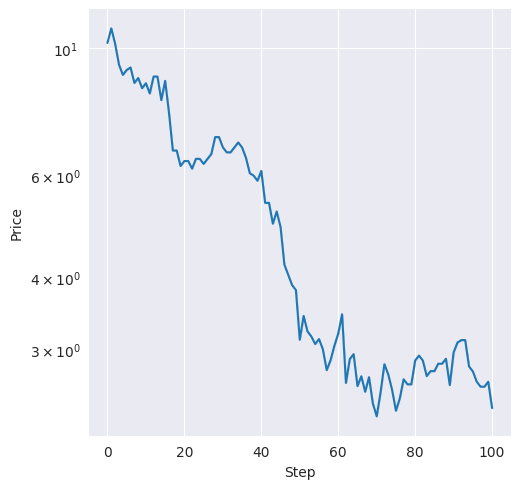

In [15]:
sns.relplot(
    data = _[ _['iteration'] == 5], kind="line",
    x="Step", y="Price",
)
plt.yscale('log');

In [19]:
print(_['iteration'].unique().tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [17]:
_ = results_df[ results_df['savers_sentiment'] == results_df['savers_sentiment'].unique()[2]]

it = _['iteration'].unique().tolist()
it.pop(0)

_df = _[ _['iteration'] == 0].drop(columns = ['iteration'])
arr = np.arange(0, len(_df.dropna()), N_agents)
array_Price_values = _df.dropna().take(arr).Price.values

array_Step_values = _df.dropna().take(arr).Step.values

for el in it:
    
    _df = _[ _['iteration'] == el].drop(columns = ['iteration'])
    arr = np.arange(0, len(_df.dropna()), N_agents)
    array_Price_values_new = _df.dropna().take(arr).Price.values
    
    array_Price_values = np.vstack((array_Price_values, array_Price_values_new))

In [17]:
mean_Price_values = np.mean(array_Price_values, axis = 0)
std_Price_values = np.std(array_Price_values, axis = 0)

In [18]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

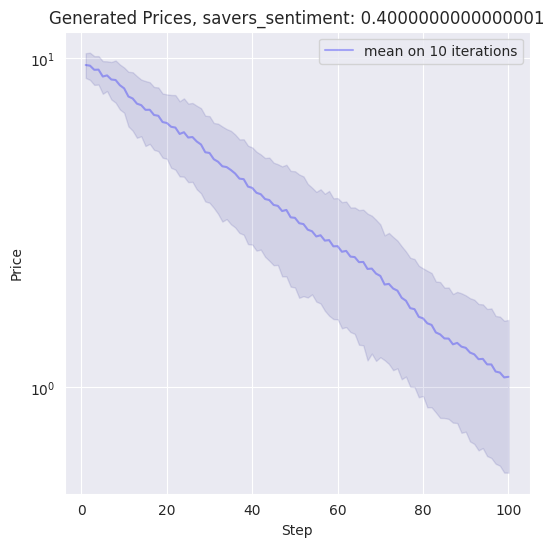

In [19]:
plt.figure()

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(array_Step_values, mean_Price_values, alpha=.3, label= 'mean on 10 iterations', color='blue')
ax.set(title = 'Generated Prices, savers_sentiment: {}'.format(results_df['savers_sentiment'].unique()[2]),
            xlabel = 'Step', ylabel = 'Price')
ax.fill_between(
    array_Step_values,
    mean_Price_values - std_Price_values,
    mean_Price_values + std_Price_values,
    alpha=0.1,
    color="navy",
    lw=1,
)

plt.legend()
plt.yscale('log')
plt.show();